In [1]:
#pip install seaborn

In [2]:
#pip install --upgrade pip

In [3]:
import re
import string
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Sequential

import seaborn as sns

# Load pre-existing dataset
# Assume X and y are loaded from the dataset

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')









[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\REDDY'S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\REDDY'S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\REDDY'S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\REDDY'S\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
def load_and_pre_clean_csv_data(csv_file_path):
    """ load the csv file data and preprocess it by removing row with any emptry column 
        or rows with any invalid data for the particular column"""
    # Load CSV data into DataFrame
    df = pd.read_csv(csv_file_path)
    df
    # Remove rows where the "text" column is empty
    df = df.dropna(subset=['text'])

    # Remove rows where the "target" column is non-numeric
    df = df[pd.to_numeric(df['target'], errors='coerce').notna()]

    # Convert "target" column to numeric type
    df['target'] = pd.to_numeric(df['target'])

    # Optional: Reset index after filtering
    df.reset_index(drop=True, inplace=True)

    return df

In [5]:
def preprocess_tweet(tweet):
    """
    Preprocess a single tweet.
    """
    # Remove links
    tweet = re.sub(r'http\S+', '', tweet)

    # Remove emojis
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')

    # Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    tweet = tweet.lower()
    return tweet

In [6]:
def tokenize_and_clean(tweet):
    """
    Tokenize, remove stopwords, and lemmatize a single tweet.
    """
    # Tokenize
    tokens = word_tokenize(tweet)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens



In [7]:
def pad_vectors(dt):
    """
        padd the rows and columns of the matrix of the vectors
    """
    width = 100
    height = 20
    for index,i  in enumerate(dt):
        diff = width - len(i)
        if diff > 0:
            dt[index] = np.append(dt[index], [0] * diff)
    
    if height > len(dt):
        dt.append([0] * width)
    
    return dt




In [8]:
# Load data from CSV file
FILE_NAME = './tweets.csv'
data = load_and_pre_clean_csv_data(FILE_NAME)
data = data.drop(columns = 'keyword', axis = 'columns')
data

id                 location  \
0          0                      NaN   
1          1                      NaN   
2          2            New York City   
3          3           Morgantown, WV   
4          4                      NaN   
...      ...                      ...   
11365  11365  Blue State in a red sea   
11366  11366               arohaonces   
11367  11367                       üáµüá≠   
11368  11368           auroraborealis   
11369  11369                      NaN   

                                                    text  target  
0      Communal violence in Bhainsa, Telangana. "Ston...       1  
1      Telangana: Section 144 has been imposed in Bha...       1  
2      Arsonist sets cars ablaze at dealership https:...       1  
3      Arsonist sets cars ablaze at dealership https:...       1  
4      "Lord Jesus, your love brings freedom and pard...       0  
...                                                  ...     ...  
11365  Media should have warned us well in advance. T...       0  
11366  i feel directly attacked üíÄ i consider moonbin ...       0  
11367  i feel directly attacked üíÄ i consider moonbin ...       0  
11368  ok who remember "outcast" nd the "dora" au?? T...       0  
11369     Jake Corway wrecked while running 14th at IRP.       1  

[11370 rows x 4 columns]

In [9]:
#pip install plotly.express

target
0    9256
1    2114
Name: count, dtype: int64


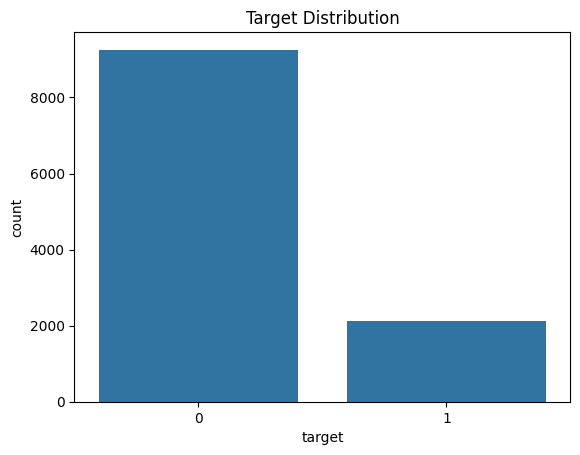

In [10]:
sns.countplot(x='target', data=data,)
plt.title('Target Distribution');

print(data['target'].value_counts())

In [11]:
# Preprocess the 'text' column
data['preprocessed_text'] = data['text'].apply(preprocess_tweet)


In [12]:
# Creating a new feature for the visualization.

data['Character Count'] = data['preprocessed_text'].apply(lambda x: len(str(x)))
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='violet')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#2846CD')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(x=feature, data=df, orient='v', ax=ax3, color='grey')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=25))

    plt.suptitle(f'{title}', fontsize=24)

C:\Users\REDDY'S\AppData\Local\Temp\ipykernel_8016\186120180.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, feature],
C:\Users\REDDY'S\AppData\Local\Temp\ipykernel_8016\186120180.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, feature],
C:\Users\REDDY'S\AppData\Loc

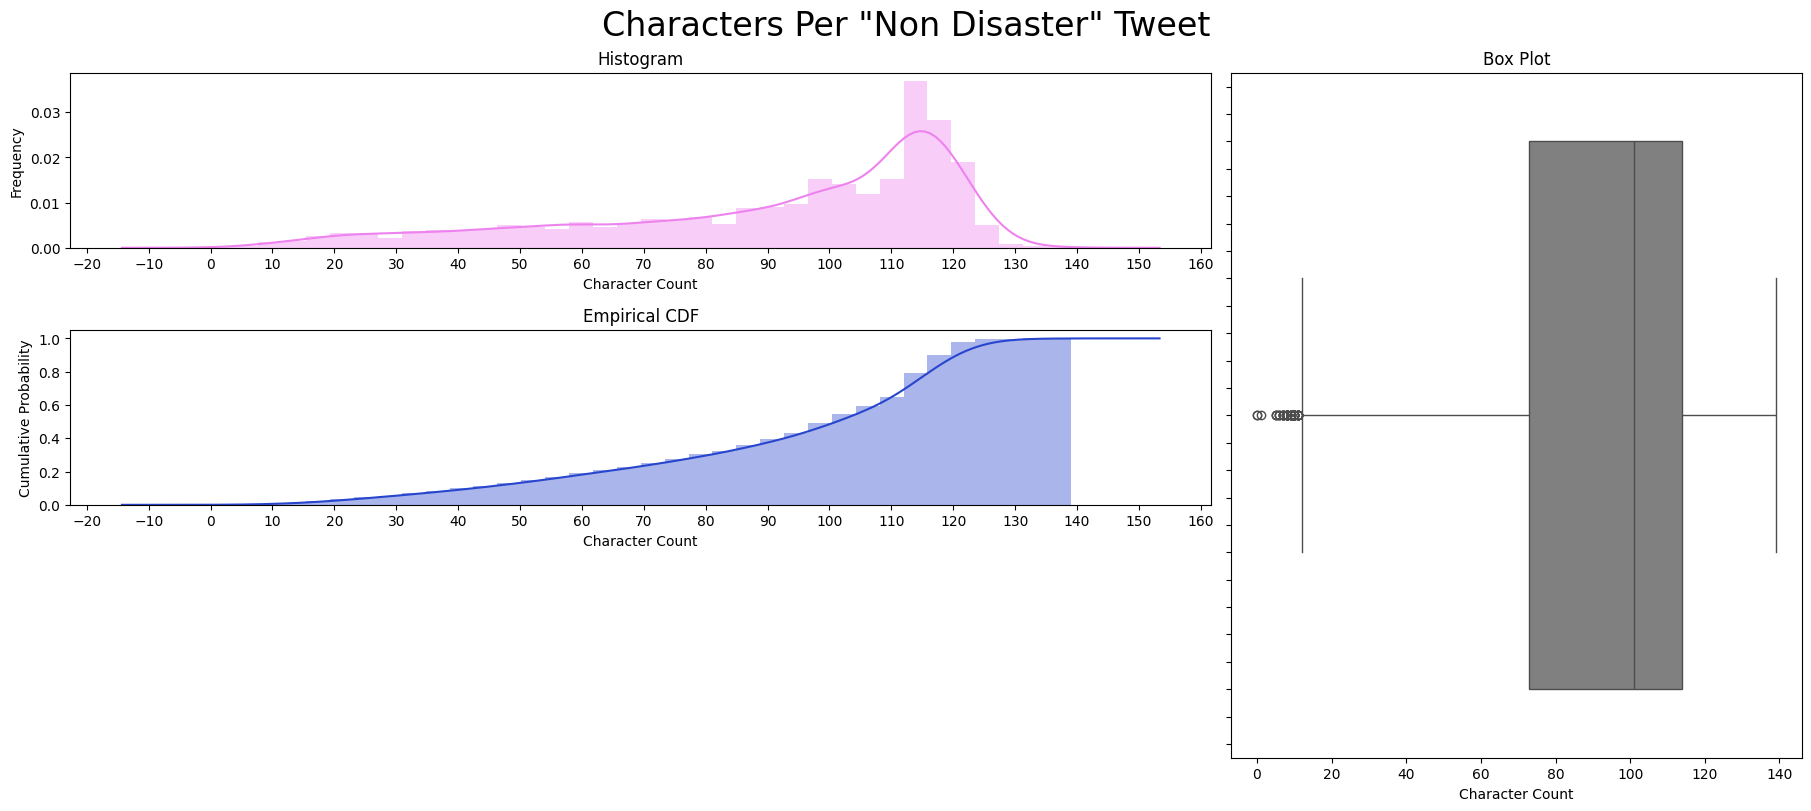

In [13]:
plot_dist3(data[data['target'] == 0], 'Character Count',
           'Characters Per "Non Disaster" Tweet')

C:\Users\REDDY'S\AppData\Local\Temp\ipykernel_8016\186120180.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, feature],
C:\Users\REDDY'S\AppData\Local\Temp\ipykernel_8016\186120180.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, feature],
C:\Users\REDDY'S\AppData\Loc

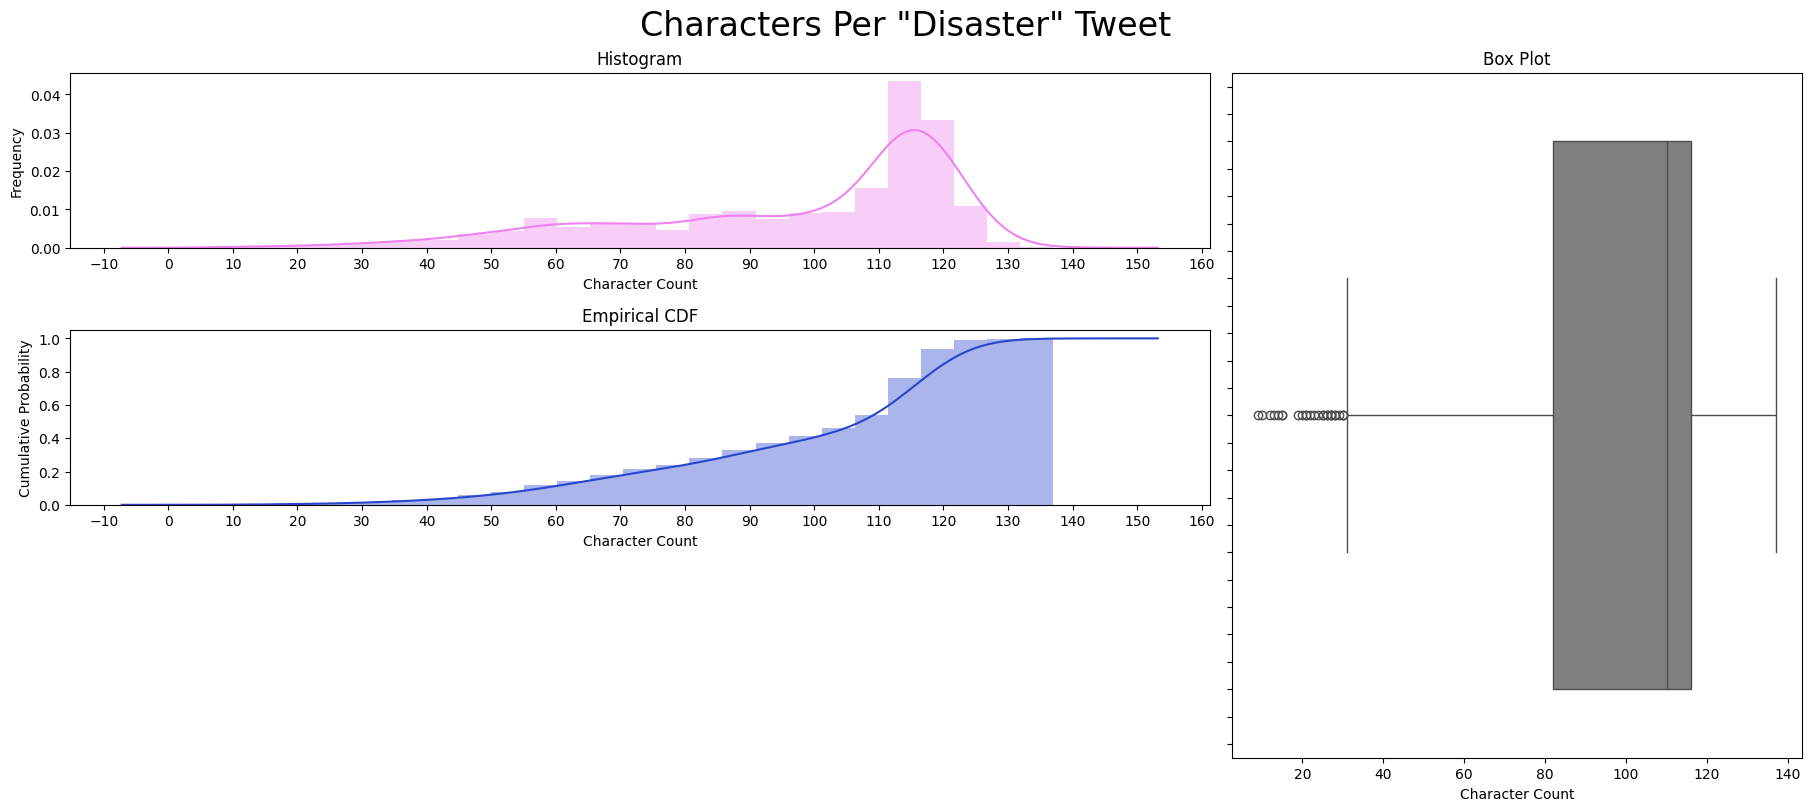

In [14]:
plot_dist3(data[data['target'] == 1], 'Character Count',
           'Characters Per "Disaster" Tweet')

In [15]:
def plot_word_number_histogram(textno, textye):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('Disaster Tweets')
    
    fig.suptitle('Words Per Tweet', fontsize=24, va='baseline')
    
    fig.tight_layout()

C:\Users\REDDY'S\AppData\Local\Temp\ipykernel_8016\1585757681.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
C:\Users\REDDY'S\AppData\Local\Temp\ipykernel_8016\1585757681.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

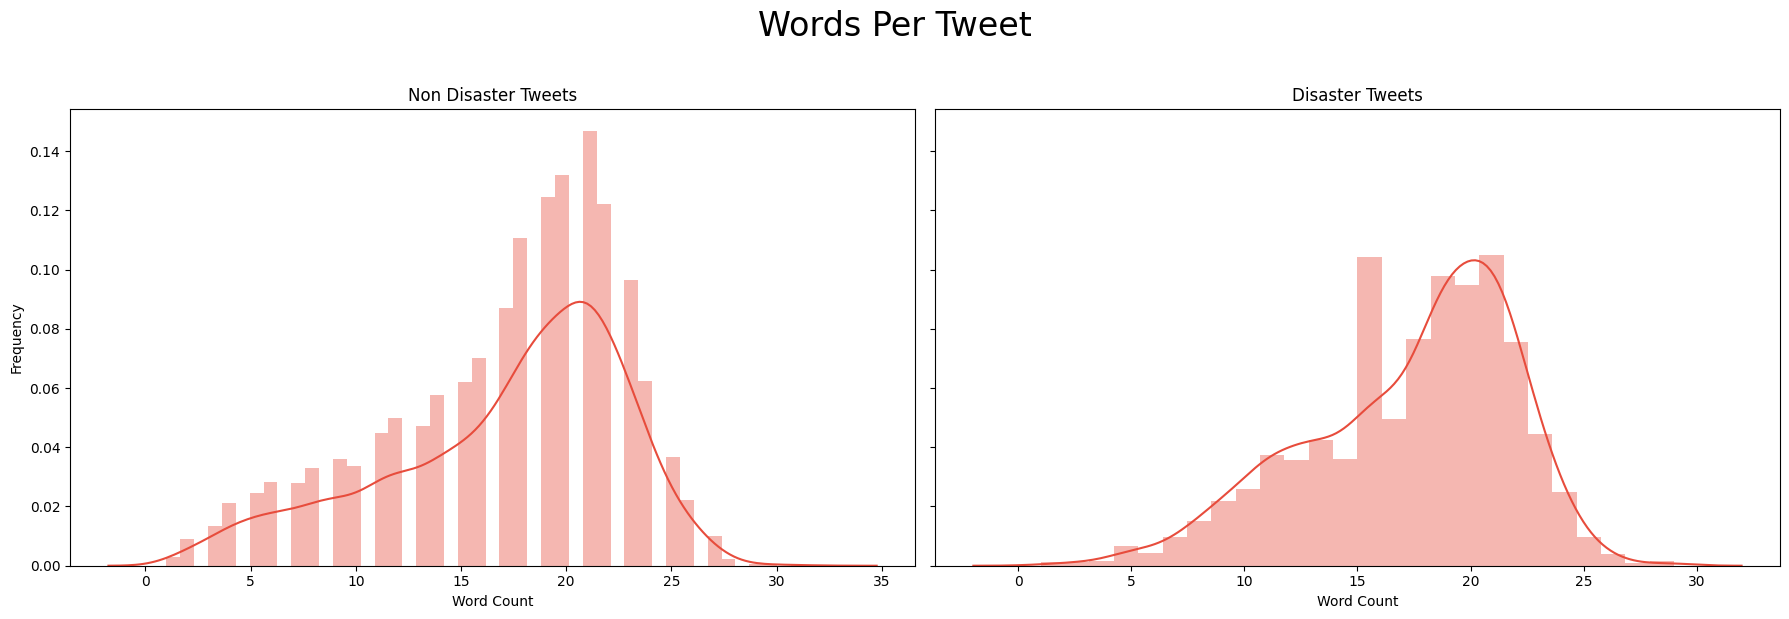

In [16]:
plot_word_number_histogram(data[data['target'] == 0]['text'],
                           data[data['target'] == 1]['text'])

In [17]:
# Tokenize, remove stopwords, and lemmatize each tweet
data['tokenized_text'] = data['preprocessed_text'].apply(tokenize_and_clean)

# remove rows where column "tokenized_text" is empty
data = data[data['tokenized_text'].apply(len) > 0]

# Display the first few rows of the preprocessed and tokenized data
data.head(20)

id         location                                               text  \
0    0              NaN  Communal violence in Bhainsa, Telangana. "Ston...   
1    1              NaN  Telangana: Section 144 has been imposed in Bha...   
2    2    New York City  Arsonist sets cars ablaze at dealership https:...   
3    3   Morgantown, WV  Arsonist sets cars ablaze at dealership https:...   
4    4              NaN  "Lord Jesus, your love brings freedom and pard...   
5    5               OC  If this child was Chinese, this tweet would ha...   
6    6  London, England  Several houses have been set ablaze in Ngemsib...   
7    7           Bharat  Asansol: A BJP office in Salanpur village was ...   
8    8     Accra, Ghana  National Security Minister, Kan Dapaah's side ...   
9    9        Searching  This creature who‚Äôs soul is no longer clarent ...   
10  10              NaN  Images showing the havoc caused by the #Camero...   
11  11              NaN  Social media went bananas after Chuba Hubbard ...   
12  12              NaN  Hausa youths set Area Office of Apapa-Iganmu L...   
13  13        HYDERABAD  Under #MamataBanerjee political violence &amp;...   
14  14         Reno, NV  AMEN! Set the whole system ablaze, man. https:...   
15  15              NaN  Images showing the havoc caused by the #Camero...   
16  16              NaN  No cows today but our local factory is sadly s...   
17  17              NaN  Rengoku sets my heart ablazeüòî‚ù§Ô∏èüî• P.s. I missed...   
18  18        Worldwide  paulzizkaphoto: ‚ÄúRundle Ablaze‚Äù Wishing you al...   
19  19              NaN  French cameroun set houses ablaze in Ndu and r...   

    target                                  preprocessed_text  \
0        1  communal violence in bhainsa telangana stones ...   
1        1  telangana section 144 has been imposed in bhai...   
2        1           arsonist sets cars ablaze at dealership    
3        1          arsonist sets cars ablaze at dealership     
4        0  lord jesus your love brings freedom and pardon...   
5        0  if this child was chinese this tweet would hav...   
6        1  several houses have been set ablaze in ngemsib...   
7        1  asansol a bjp office in salanpur village was s...   
8        0  national security minister kan dapaahs side ch...   
9        0  this creature whos soul is no longer clarent b...   
10       1  images showing the havoc caused by the cameroo...   
11       0  social media went bananas after chuba hubbard ...   
12       1  hausa youths set area office of apapaiganmu lo...   
13       1  under mamatabanerjee political violence amp va...   
14       0              amen set the whole system ablaze man    
15       1  images showing the havoc caused by the cameroo...   
16       1  no cows today but our local factory is sadly s...   
17       0  rengoku sets my heart ablaze ps i missed this ...   
18       0  paulzizkaphoto rundle ablaze wishing you all a...   
19       1  french cameroun set houses ablaze in ndu and r...   

    Character Count                                     tokenized_text  
0               120  [communal, violence, bhainsa, telangana, stone...  
1               127  [telangana, section, 144, imposed, bhainsa, ja...  
2                40           [arsonist, set, car, ablaze, dealership]  
3                41           [arsonist, set, car, ablaze, dealership]  
4               113  [lord, jesus, love, brings, freedom, pardon, f...  
5               118  [child, chinese, tweet, would, gone, viral, so...  
6               114  [several, house, set, ablaze, ngemsibaa, villa...  
7               127  [asansol, bjp, office, salanpur, village, set,...  
8               108  [national, security, minister, kan, dapaahs, s...  
9               102  [creature, who, soul, longer, clarent, blue, a...  
10              120  [image, showing, havoc, caused, cameroon, mili...  
11              102  [social, medium, went, banana, chuba, hubbard,...  
12              121  [hausa, youth

In [18]:
# vectorize tweets
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['preprocessed_text'])
y = data['target']

data['lemma_str'] = [' '.join(map(str, l)) for l in data['tokenized_text']]
# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n\n\n")



C:\Users\REDDY'S\AppData\Local\Temp\ipykernel_8016\1445020277.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lemma_str'] = [' '.join(map(str, l)) for l in data['tokenized_text']]


In [19]:
def oversampling_minority(vectorized_x, y):
    from imblearn.over_sampling import RandomOverSampler
    from sklearn.feature_extraction.text import CountVectorizer
    import pandas as pd

#     X_class_1 = data['preprocessed_text']
#     y_class_1 = data['target']

#     vectorizer = CountVectorizer()
#     X_count_class_1 = vectorizer.fit_transform(X_class_1)

    oversampler = RandomOverSampler(sampling_strategy='minority')
    X_resampled_class_1, y_resampled_class_1 = oversampler.fit_resample(vectorized_x, y)
#     print(y_resampled_class_1.value_counts())
    
    return X_resampled_class_1, y_resampled_class_1

In [20]:
X, y = oversampling_minority(X, y)

In [21]:
demo = X.toarray()
len(demo)

18498

In [ ]:
from collections import Counter
list_counts = Counter(map(tuple, demo))

# Find duplicate lists
duplicate_lists = [list(elem) for elem, count in list_counts.items() if count > 1]

# Print duplicate lists
print("Duplicate Lists:", duplicate_lists)

In [ ]:
counts = np.bincount(y)
print(counts)
# Plotting the counts
labels = ['0', '1']
plt.bar(labels, counts[:2], color=['blue', 'orange'])
plt.xlabel('target')
plt.ylabel('count')
plt.title('Target Distribution')
plt.show()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46, stratify = y)

# Check the class ratio in training and testing sets
train_class_ratio = np.bincount(y_train)
test_class_ratio = np.bincount(y_test)
train_class_ratio

In [ ]:
from collections import Counter
stop_words = set(stopwords.words('english'))
lis = [
    data[data['target'] == 0]['lemma_str'],
    data[data['target'] == 1]['lemma_str']
]
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
        if (word not in stop_words):
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, palette='plasma', ax=j)
axes[0].set_title('Non Disaster Tweets')

axes[1].set_title('Disaster Tweets')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')

fig.suptitle('Most Common Unigrams', fontsize=24, va='baseline')
plt.tight_layout()

In [ ]:
def ngrams(n, title):
    """A Function to plot most common ngrams"""
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette='plasma', ax=j)
        
        axes[0].set_title('Non Disaster Tweets')
        axes[1].set_title('Disaster Tweets')
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()

In [ ]:
ngrams(2, 'Most Common Bigrams')


In [ ]:
ngrams(3, 'Most Common Trigrams')


In [ ]:
''' # word cloud of disaster and non-disaster tweets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 5])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(data[data['target'] ==1 ]['text']))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(data[data['target'] ==0 ]['text']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40); '''

In [ ]:
data.head()

In [ ]:
#pip install xgboost

In [ ]:
# Supervised Learning Models
from xgboost import XGBClassifier

print("Supervised Learning Models".upper())
models = {
    'Logistic Regression': LogisticRegression(penalty='l2', dual = False),
    'Decision Tree': DecisionTreeClassifier(criterion = 'log_loss'),
    
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(kernel='rbf'),
    'xgb' : XGBClassifier()
}

evals = {}
accs = {}
prec = {}
rec = {}
f1 = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    f1score = f1_score(y_test, y_pred)
    
    accs[name] = accuracy
    prec[name] = precision
    rec[name] = recall
    f1[name] = f1score
    
    evals[name] = [accuracy, precision, recall, f1score]
    
    print(f"\n{name}\n".upper())
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Precision: {precision}")
    print(f"{name} Recall: {recall}")
    print(f"{name} F1score: {f1score}")
    
#     cm = confusion_matrix(y_test, y_pred)

# # Plotting the confusion matrix
#     plt.figure(figsize=(4, 4))
#     sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# # Add labels and title
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.title('Confusion Matrix')

# # Show the plot
#     plt.show()


    print("\n ----------------------------------- \n")



In [ ]:
evals

In [ ]:
xaxis = list(accs.keys())
yaxis = list(accs.values())
yaxis

In [ ]:
plt.bar(xaxis, yaxis)

# Adding labels and title
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Dictionary Keys vs Values')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.01)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test, y_pred)

accuracy
precision
recall
f1score

In [ ]:
# Deep Learning Models
print("Deep Learning Models".upper())
X_train = X_train.toarray()
X_test = X_test.toarray()

VOCAB_SIZE =10000
EMBEDDING_DIM = 16

model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)

print("Loss: ", loss)
print("Accuracy: ", accuracy)
print("\n\n\n")






In [ ]:
# Ensemble Method (Voting Classifier)
print("Ensemble Method (Voting Classifier)".upper())
estimators = list(models.items())
voting_classifier = VotingClassifier(estimators)
voting_classifier.fit(X_train, y_train)
y_pred = voting_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy}")

In [ ]:
randomForestModel = RandomForestClassifier(n_estimators = 50, criterion = 'log_loss')
randomForestModel.fit(X_train, y_train)
y_pred = randomForestModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test, y_pred)

accs['randomforest'] = accuracy
prec['randomforest'] = precision
rec['randomforest'] = recall
f1['randomforest'] = f1score
evals['randomforest'] = [accuracy, precision, recall, f1score]

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1score: {f1score}")
print("\n ----------------------------------- \n")

In [ ]:

X_axis = np.arange(len(xaxis)) 

fig, ax = plt.subplots(figsize =(10, 10))

# plt.figure(figsize = (15,6))
ax.barh(X_axis-0.4, accs.values(), 0.2, label = 'accuracy') 
ax.barh(X_axis-0.2, prec.values(), 0.2, label = 'precision')
ax.barh(X_axis, rec.values(), 0.2, label = 'recall')
ax.barh(X_axis+0.2, f1.values(), 0.2, label = 'f1-score')

# values = list(evals.values())
# num_metrics = len(values[0])
# # values[0]
# for i, key in enumerate(evals):
#     bars = ax.bar(num_metrics + i * 0.03, evals[key], width=0.01, label=key)
    
  
# # for i, key in enumerate(accs):
# #     bars = ax.bar(x_positions + i * bar_width, values[i], width=bar_width, label=key)
# #     for bar in bars:
# #         yval = bar.get_height()
# #         ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

for i in ax.patches:
    plt.text(i.get_width()+0.02, i.get_y()+0.1, 
             str(round((i.get_width()), 4)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

plt.yticks(X_axis, xaxis) 
# ax.set_yticklabels(['Logistic regression', 'Decision tree', 'Gradient Boosting', 'SVM', 'XGBoost'])
plt.xlabel("percentage") 
plt.ylabel("algorithm") 
plt.title("Evaluation metrics") 
plt.legend()
plt.savefig('metrics.png')
plt.show()
# X_axis

In [ ]:
fig, ax = plt.subplots(figsize =(7, 4))
bars = ax.bar(xaxis, yaxis)
# for i in ax.patches:
#     plt.text(i.get_width()+0.02, i.get_y()+0.3, 
#              str(round((i.get_width()), 4)),
#              fontsize = 10, fontweight ='bold',
#              color ='grey')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.xlabel('algorithm')
plt.ylabel('value')
plt.title('Accuracy')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=80)